In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
full_df = pd.read_csv('data/raw/owid-covid-data.csv')
full_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
full_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
'''
We note that there are some countries with NA in all values/dates of some columns. We may need to remove these countries from the analyses
for those variables since the numbers are not available (and not 0)

iso_all_na_df is the df which contains True if index country has all na in a column value
'''

# Group by 'iso_code' and check if all values in specified columns are NA for each country
iso_all_na_df = full_df.groupby('iso_code')[full_df.columns].apply(lambda x: x.isna().all())

# Print example of columns of ABW that are all NA
print(iso_all_na_df.loc['ABW'][iso_all_na_df.loc['ABW']==True])
iso_all_na_df.head()

reproduction_rate                     True
icu_patients                          True
icu_patients_per_million              True
hosp_patients                         True
hosp_patients_per_million             True
weekly_icu_admissions                 True
weekly_icu_admissions_per_million     True
weekly_hosp_admissions                True
weekly_hosp_admissions_per_million    True
new_tests_smoothed                    True
new_tests_smoothed_per_thousand       True
positive_rate                         True
tests_per_case                        True
total_boosters                        True
total_boosters_per_hundred            True
extreme_poverty                       True
cardiovasc_death_rate                 True
female_smokers                        True
male_smokers                          True
handwashing_facilities                True
hospital_beds_per_thousand            True
human_development_index               True
Name: ABW, dtype: bool


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ABW,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,False
AFG,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,True,True
AGO,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,True,True,True
AIA,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,True,True,True
ALB,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [5]:
# Example of checking which countries are all NA for a column
print(iso_all_na_df.index[iso_all_na_df['icu_patients']==True])

# Example of checking which countrie are NOT all NA for a list of columns
na_cols = ['icu_patients', 'positive_rate']
print(iso_all_na_df.index[(iso_all_na_df[na_cols]==False).all(axis=1)])

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARM', 'ASM', 'ATG',
       ...
       'VEN', 'VGB', 'VIR', 'VNM', 'VUT', 'WLF', 'WSM', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=213)
Index(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BOL', 'CAN', 'CHE', 'CHL', 'CYP',
       'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'IRL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MLT', 'MYS', 'NLD', 'PRT',
       'ROU', 'SRB', 'SVK', 'SVN', 'SWE', 'USA', 'ZAF'],
      dtype='object', name='iso_code')


## Exploratory plots

### Timeseries Heatmap

Let us look at some heatmaps of new_cases_smoothed_per_million, new_deaths_per_million and new_vaccinations_smoothed_per_million.

Predictors are:
            'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
             'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index', 'stringency_index'

Our response is new_deaths_smoothed_per_million, weekly_icu_admissions_per_million, weekly_hosp_admissions_per_million

In [6]:
# List of countries that have all columns with at least some info reported for response
plot_cols = ['weekly_icu_admissions_per_million', 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million', 
             'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
             'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index', 'stringency_index']
countries_to_plot = iso_all_na_df.index[(iso_all_na_df[plot_cols]==False).all(axis=1)]
print(countries_to_plot)


# List of relevant columns
relevant_cols = ['iso_code', 'date',
                'weekly_icu_admissions_per_million', 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million', 
                'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
                'new_vaccinations_smoothed_per_million', 'population_density', 'median_age', 'aged_65_older',
                'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
                'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
                'life_expectancy', 'human_development_index', 'stringency_index']

# Filter out the relevant countries
no_na_df = full_df[full_df['iso_code'].isin(countries_to_plot)][relevant_cols]


Index(['CHL', 'CYP', 'CZE', 'DEU', 'ESP', 'EST', 'FRA', 'GRC', 'HUN', 'IRL',
       'ISR', 'ITA', 'KOR', 'LUX', 'LVA', 'MLT', 'NLD', 'NOR', 'SGP', 'SVK',
       'SVN'],
      dtype='object', name='iso_code')


Some of the variables like life expectancy should be relatively constant and never 0. Thus we check that these entries are constant and if not we enforce them to be constant (if NA).

Time-series predictors are:

            'people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
            'new_vaccinations_smoothed_per_million', 'stringency_index'

Constant predictors are:

             'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 
             'male_smokers', 'female_smokers', 'hospital_beds_per_thousand', 
             'life_expectancy', 'human_development_index'

Our response are:

            'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million'

In [7]:
# List of constant predictor variables
constant_columns = ['population_density', 'median_age', 'aged_65_older',
                    'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                    'male_smokers', 'female_smokers', 'hospital_beds_per_thousand',
                    'life_expectancy', 'human_development_index']

# Iterate through each country and enforce constant values for constant variables
for iso_code, country_data in no_na_df.groupby('iso_code'):
    for column in constant_columns:
        mask = (country_data[column] == 0)
        if mask.all():  # If all values in the column are 0
            print(f'All data in {iso_code}, {column} is 0.')
            continue
        if mask.any():  # Check if any non-zero value exists
            constant_value = country_data[mask, column].iloc[0]  # Get the first non-zero value
            country_data.loc[~mask, column] = constant_value  # Fill 0 values with the constant value

        constant_value = country_data[column].iloc[0]  # Get the first value
        country_data.loc[:, column] = constant_value  # Set all values in the column to the constant value

print("DataFrame after enforcing constant values:")
no_na_df

DataFrame after enforcing constant values:


,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,ESP,2024-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335212,ESP,2024-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335213,ESP,2024-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN
335214,ESP,2024-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,NaN


In [8]:
time_dependent_cols = ['people_fully_vaccinated_per_hundred',
                        'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million',
                        'new_cases_smoothed_per_million', 'tests_per_case', 'new_vaccinations_smoothed_per_million', 'stringency_index']

# Function to interpolate missing values within each group
def interpolate_group(group):
    group['people_fully_vaccinated_per_hundred'] = group['people_fully_vaccinated_per_hundred'].interpolate().ffill().fillna(0)
    return group

    
# First note that cumulative (non-decreasing) data like fully_vaccinated cannot be filled with 0s in the middle and end
no_na_df = no_na_df.groupby('iso_code',group_keys=False).apply(interpolate_group)

# We don't want to fill a cumulative (non-decreasing) data like fully_vaccinated with 0s
no_na_df[time_dependent_cols[1:]] = no_na_df[time_dependent_cols[1:]].fillna(value=0)
no_na_df

,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,ESP,2024-04-17,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335212,ESP,2024-04-18,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335213,ESP,2024-04-19,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335214,ESP,2024-04-20,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0


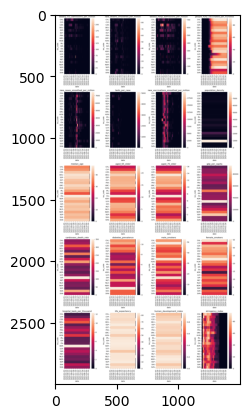

In [9]:
import matplotlib.image as mpimg

img_path = 'output/heatmap_plot.png'
import os
if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
else:
    # Heat Plotting all columns
    plt.figure(figsize=(15, 30))
    for i, col in enumerate(plot_cols):
        temp_df = no_na_df.pivot(index='iso_code', columns='date', values=col).fillna(0)
        plt.subplot(5, 4, i+1)
        sns.heatmap(temp_df)
        plt.title(col)
    plt.tight_layout()
    plt.savefig('output/heatmap_plot.png')
    plt.show()
    

Note that in the above we see black stripes (on the right) in some country data because there are some dates where the country has no entries. This isn't a problem datawise

### ACF and PACF

We would now like to look at ACF and PACF as it helps to determine the AR and MA parameters for the ARIMA model. We first check stationarity of our response variables.

In [10]:
from statsmodels.tsa.stattools import adfuller

def get_stationary(series):
    '''
    Returns the p-value of ADF statistic for an input series
    '''
    result = adfuller(series.values)

    return result[1]

#'new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million'
stationary_death = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['new_deaths_smoothed_per_million']))
stationary_icu = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['weekly_icu_admissions_per_million']))
stationary_hosp = no_na_df.groupby('iso_code').apply(lambda group: get_stationary(group['weekly_hosp_admissions_per_million']))

pd.concat([stationary_death, stationary_icu, stationary_hosp], axis=1).rename(columns={0: 'p-value of death', 1: 'p-values of ICU admissions', 2: 'p-values of hospital admissions'})

,p-value of death,p-values of ICU admissions,p-values of hospital admissions
iso_code,,,
CHL,0.000004,8.664685e-02,0.006118
CYP,0.019748,1.040450e-02,0.003190
CZE,0.074480,4.503710e-02,0.033092
DEU,0.001100,3.073623e-01,0.051564
ESP,0.001147,7.848548e-02,0.023532
EST,0.080378,7.114841e-02,0.030509
FRA,0.079968,2.126098e-04,0.000322
GRC,0.028219,1.572042e-02,0.024391
HUN,0.002053,3.114113e-02,0.003425


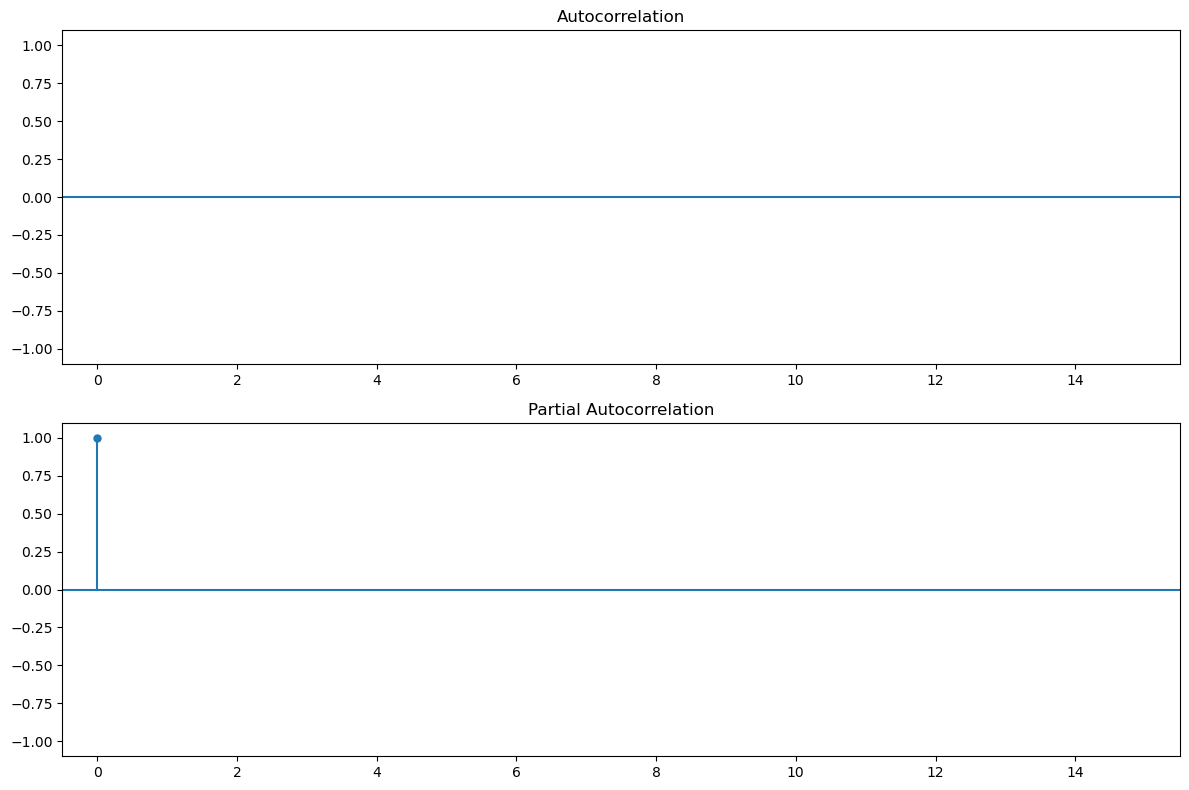

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='new_deaths_smoothed_per_million').loc['SGP'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='new_deaths_smoothed_per_million').loc['SGP'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

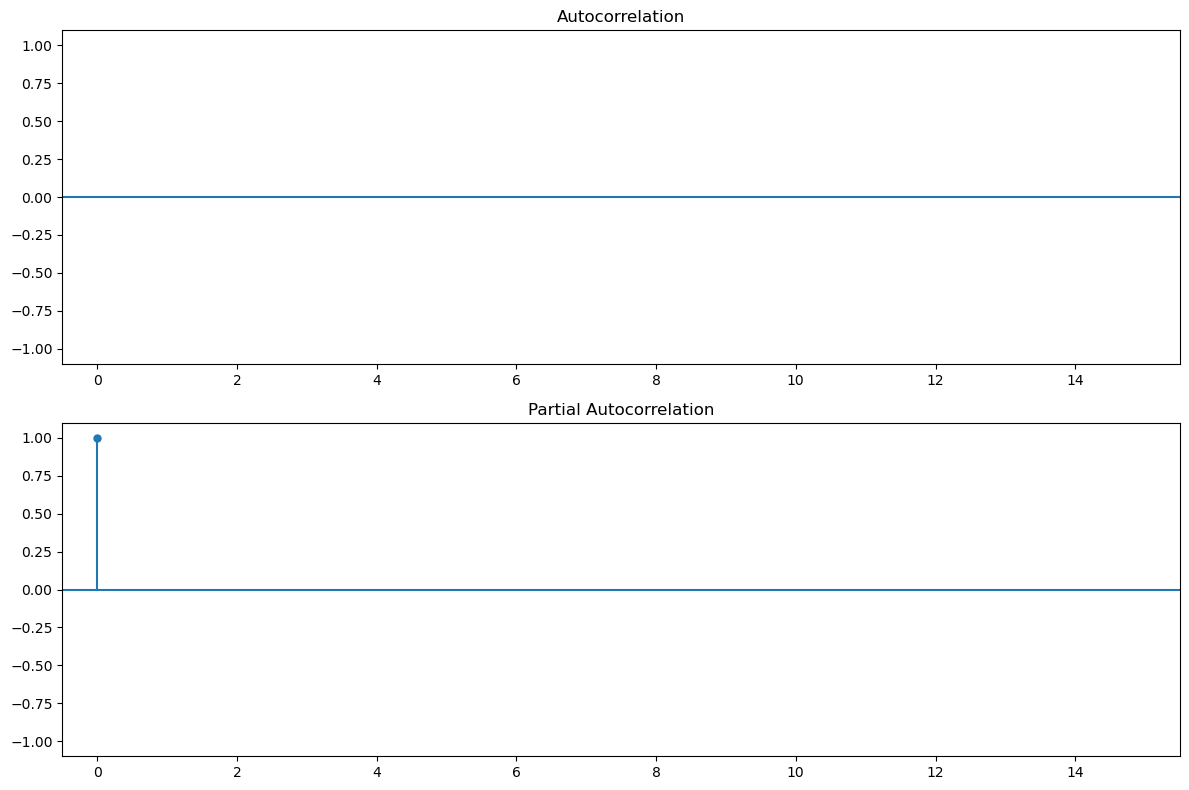

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_icu_admissions_per_million').loc['SGP'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_icu_admissions_per_million').loc['SGP'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

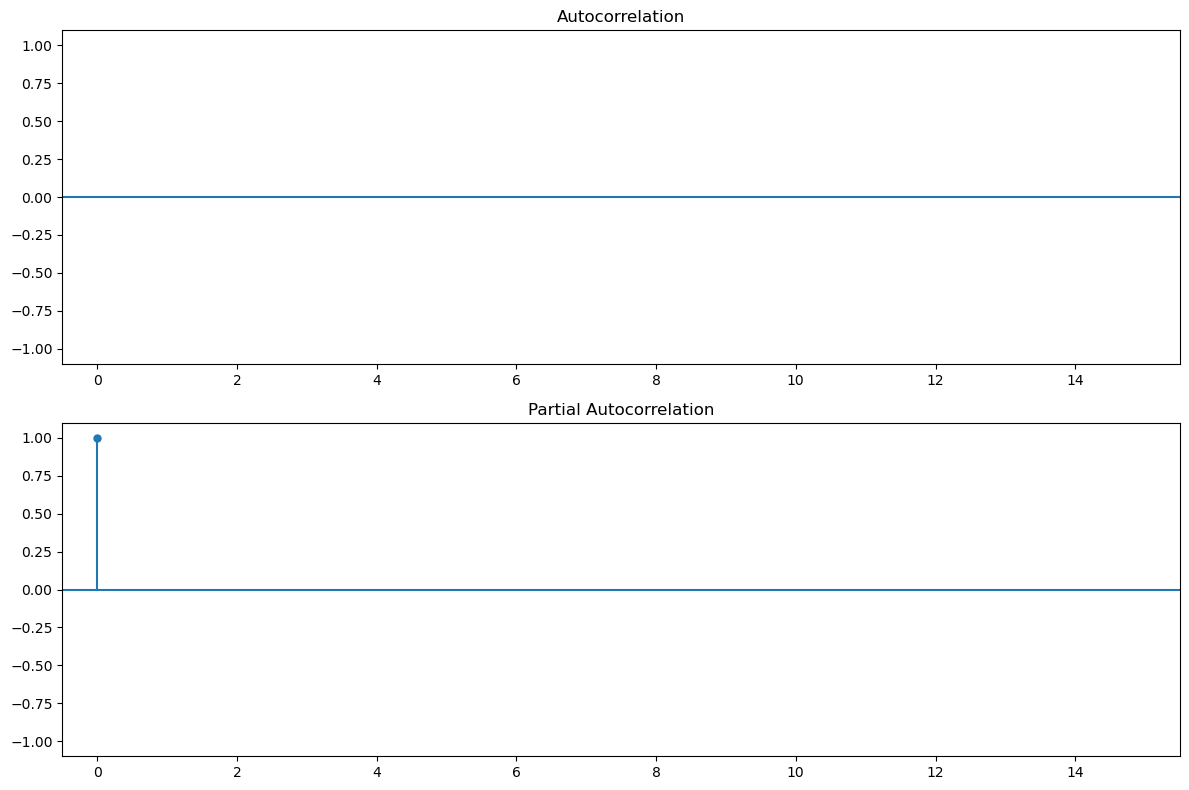

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['SGP'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['SGP'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

From the plots above it suggests that any ARIMA model will perform poorly on 'new_deaths_smoothed_per_million', 'weekly_hosp_admissions_per_million' and 'weekly_icu_admissions_per_million' as there's little to no correlation. This makes sense since we expect them to be a function of case numbers and various other factors. 

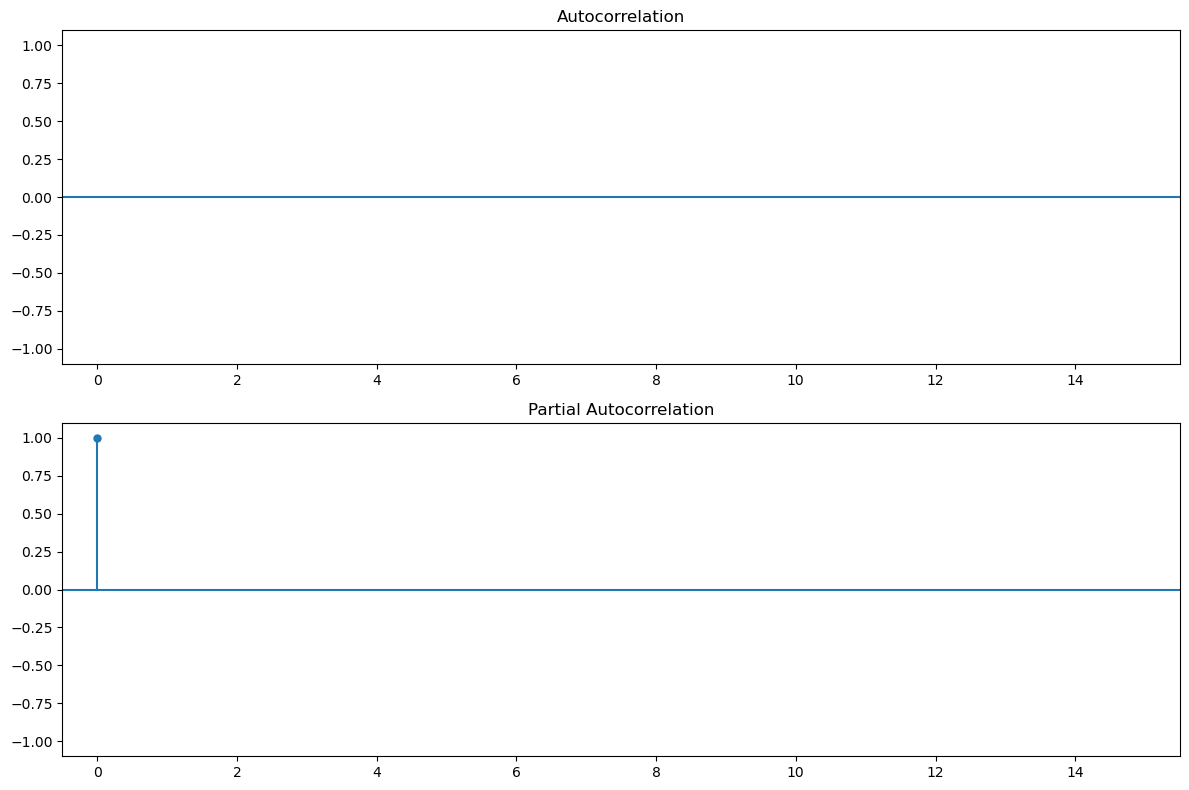

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plot_acf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['DEU'].values, ax=ax[0], lags=15)
plot_pacf(no_na_df.pivot(index='iso_code', columns='date', values='weekly_hosp_admissions_per_million').loc['DEU'].values, ax=ax[1], lags=15)

for i in range(2):
    ax[i].set_xlim([-0.5, 15.5])
    ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

# Linear Regression Model

In [15]:
no_na_df.groupby('iso_code', group_keys=False).shift(1)

,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,median_age,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67522,2020-01-05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,2020-01-06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,2020-01-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,2020-01-08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,24.282,35.4,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335211,2024-04-16,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335212,2024-04-17,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335213,2024-04-18,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0
335214,2024-04-19,0.0,0.0,0.0,85.66,0.0,0.0,0.0,93.105,45.5,...,13.799,34272.360,99.403,7.17,31.4,27.4,2.97,83.56,0.904,0.0


There are 2 ways we can split train and test sets.
1. We can split by countries and train our data that way
2. We can split by time and train our data that way

Using the first method is problematic in our opinion since often the different country data is correlated (for the same time period). This is problematic since it may just cause data leakage from the test set. As such we use the second method, splitting our train and test sets by time. 

We first split the data (chronologically) into train and test sets with a $0.9$-$0.1$ ratio. We then perform training/validation on the train set and finally evaluate the performance on the test set.

In [16]:
train_df = no_na_df.groupby('iso_code', group_keys=False).apply(lambda group: group.iloc[:9*len(group.index)//10,:])
test_df = no_na_df.groupby('iso_code', group_keys=False).apply(lambda group: group.iloc[9*len(group.index)//10:,:])
train_df

,iso_code,date,weekly_icu_admissions_per_million,new_deaths_smoothed_per_million,weekly_hosp_admissions_per_million,people_fully_vaccinated_per_hundred,new_cases_smoothed_per_million,tests_per_case,new_vaccinations_smoothed_per_million,population_density,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,male_smokers,female_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,stringency_index
67521,CHL,2020-01-05,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67522,CHL,2020-01-06,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67523,CHL,2020-01-07,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67524,CHL,2020-01-08,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
67525,CHL,2020-01-09,0.0,0.000,0.0,0.00,0.000,0.0,0.0,24.282,...,6.938,22767.037,127.993,8.46,41.5,34.2,2.11,80.18,0.851,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324071,SVN,2023-11-12,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0
324072,SVN,2023-11-13,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0
324073,SVN,2023-11-14,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0
324074,SVN,2023-11-15,0.0,1.752,0.0,57.66,32.954,0.0,0.0,102.619,...,12.930,31400.840,153.493,7.25,25.0,20.1,4.50,81.32,0.917,0.0


We want to look at the following hyperparameters:
1. Ridge vs LASSO regression (L1 or L2 regularisation loss)
2. Magnitude of regularisation
3. Number of days prior to fit the linear model

To choose the best set of hyperparameters, we use walk-forward validating. We look at 5 splits where for each country we look at length of the country data (note that this varies), then split it into 6 pieces chronologically (say $B_1, B_2, ..., B_6$ reprenting the 6 blocks of data). At split $i$, we train on $\cup_{j\leq i}B_j$ (of all the countries) and validate on $B_{i+1}$. 

In [17]:
time_dep_variables = ['people_fully_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'tests_per_case',
            'new_vaccinations_smoothed_per_million', 'stringency_index']
response_variables = ['new_deaths_smoothed_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million']

In [18]:
from sklearn import linear_model

shift = 3
n_splits = 5
reg_type = 'lasso'

def train_lm(df, shift, reg_type, alpha, n_splits=5):
    '''
    Trains a linear regression model on df using walk-forward validation and hyperparameter choice
    
    Inputs:
    df is the dataframe which should have all the columns of original dataset
    shift is an integer representing the number of days in the past to use as forecast
    reg_type should be a string with 'lasso' represeting LASSO regularisation
        or 'ridge' for ridge regularisation
    alpha is the float representing the magnitude of regularisation
    n_splits is the number of splits (note that this means the technically the data is split into
        n_splits+1 pieces) for walk-forward validation

    Returns:
    scores a list (of length n_splits) containing the R^2 validation scores of all splits
    '''
    lag_df = df.copy()
    # Create lag features for predictors
    for feature in time_dep_variables:
        for i in range(1, shift + 1):
            lag_df[f'{feature}_lag_{i}'] = df.groupby('iso_code')[feature].shift(i)
    lag_df = lag_df.dropna()
    
    scores = []
    # Walk-forward validation
    for i in range(n_splits):
        # Get the different blocks of data for training and validation
        train_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[:(i+1)*len(group.index)//(n_splits+1),:])
        val_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[(i+1)*len(group.index)//(n_splits+1):(i+2)*len(group.index)//(n_splits+1),:])

        # Drop irrelevant columns to get x,y
        x_train = train_df.drop(columns=response_variables+['iso_code', 'date']+ time_dep_variables)
        y_train = train_df[response_variables]
        x_val = val_df.drop(columns=response_variables+['iso_code', 'date']+ time_dep_variables)
        y_val = val_df[response_variables]

        if reg_type == 'lasso':
            model = linear_model.LassoLars(alpha=alpha)
            model.fit(x_train, y_train)
            split_score = model.score(x_val, y_val)
        elif reg_type == 'ridge':
            model = linear_model.Ridge(alpha=alpha)
            model.fit(x_train, y_train)
            split_score = model.score(x_val, y_val)
        scores.append(split_score)
        
    return scores

train_lm(train_df, shift=3, reg_type='ridge', alpha=0.001, n_splits=5)

[0.21263413594076386,
 -0.29154977536040555,
 -10.106815777017964,
 -1.410436003729793,
 -10.096627860998273]

In [19]:
import os
alpha_list = [1e-4, 1e-3, 1e-2, 1e-1, 1., 1e1, 1e2]
reg_type_list = ['lasso','ridge']
shift_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

results_path = 'output/lm_results.csv'
if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)
else:
    results_scores = []
    for alpha in alpha_list:
        for reg_type in reg_type_list:
            for shift in shift_list:
                scores = train_lm(train_df, shift=shift, reg_type=reg_type, alpha=alpha)
                mean_score = np.mean(scores)
                results_scores.append({
                'shift': shift,
                'regularisation type': reg_type,
                'regularisation magnitude': alpha,
                'validation score': mean_score
                })

    # Convert scores to DataFrame
    results_df = pd.DataFrame(results_scores)
    results_df.to_csv(results_path)

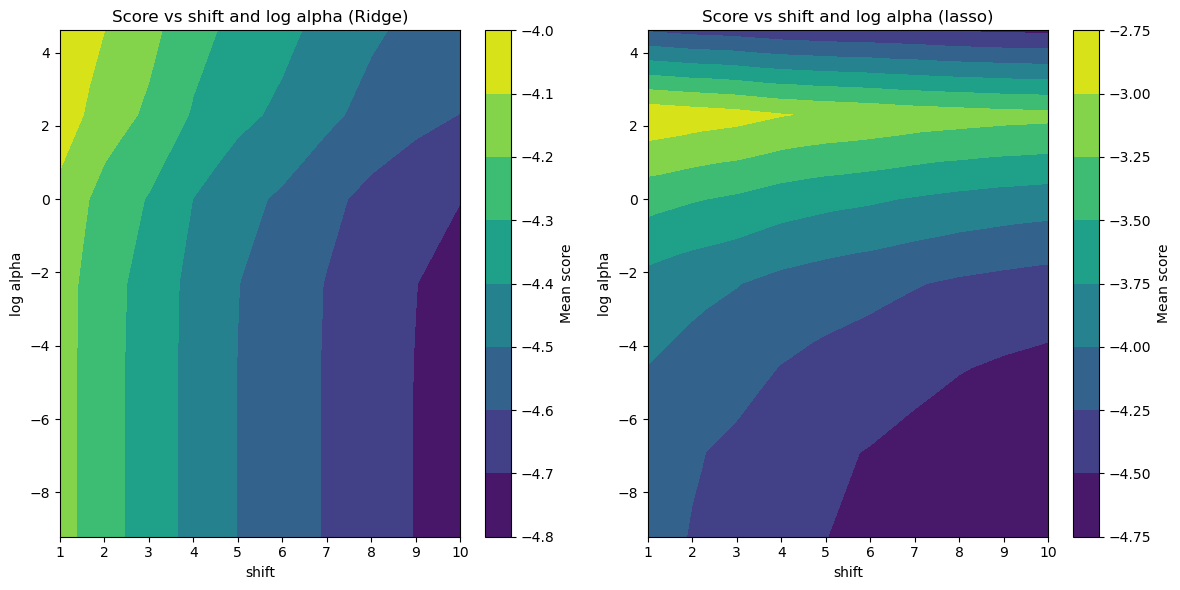

In [20]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot contour plot for Ridge 
contour1 = axes[0].tricontourf(results_df[results_df['regularisation type']=='ridge']['shift'].values, 
                        np.log(results_df[results_df['regularisation type']=='ridge']['regularisation magnitude'].values),
                        results_df[results_df['regularisation type']=='ridge']['validation score'].values, cmap='viridis')
fig.colorbar(contour1, ax=axes[0], label='Mean score')
axes[0].set_xlabel('shift')
axes[0].set_ylabel('log alpha')
axes[0].set_title('Score vs shift and log alpha (Ridge)')

# Plot contour plot for Ridge 
contour2 = axes[1].tricontourf(results_df[results_df['regularisation type']=='lasso']['shift'].values, 
                        np.log(results_df[results_df['regularisation type']=='lasso']['regularisation magnitude'].values),
                        results_df[results_df['regularisation type']=='lasso']['validation score'].values, cmap='viridis')
fig.colorbar(contour2, ax=axes[1], label='Mean score')
axes[1].set_xlabel('shift')
axes[1].set_ylabel('log alpha')
axes[1].set_title('Score vs shift and log alpha (lasso)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

# By default uses CID for random seed.
def train_rf(df, shift, max_depth, bootstrap, seed=1843091, n_splits=5):
    '''
    Trains a random forest model on df using walk-forward validation and hyperparameter choice
    
    Inputs:
    df is the dataframe which should have all the columns of original dataset
    shift is an integer representing the number of days in the past to use as forecast
    max_depth is an integer representing the maximum depth of the tree. Can also be set to 
        None if no maximum depth
    bootstrap is a boolean representing whether to bootstrap samples of data 
    n_splits is the number of splits (note that this means the technically the data is split into
        n_splits+1 pieces) for walk-forward validation

    Returns:
    scores a list (of length n_splits) containing the R^2 validation scores of all splits
    '''
    lag_df = df.copy()
    # Create lag features for predictors
    for feature in time_dep_variables:
        for i in range(1, shift + 1):
            lag_df[f'{feature}_lag_{i}'] = df.groupby('iso_code')[feature].shift(i)
    lag_df = lag_df.dropna()
    
    scores = []
    # Walk-forward validation
    for i in range(n_splits):
        # Get the different blocks of data for training and validation
        train_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[:(i+1)*len(group.index)//(n_splits+1),:])
        val_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[(i+1)*len(group.index)//(n_splits+1):(i+2)*len(group.index)//(n_splits+1),:])

        # Drop irrelevant columns to get x,y
        x_train = train_df.drop(columns=response_variables+['iso_code', 'date']+ time_dep_variables)
        y_train = train_df[response_variables]
        x_val = val_df.drop(columns=response_variables+['iso_code', 'date']+ time_dep_variables)
        y_val = val_df[response_variables]

        model = RandomForestRegressor(max_depth=max_depth, bootstrap=bootstrap, random_state=seed, n_jobs=-1)
        model.fit(x_train, y_train)
        split_score = model.score(x_val, y_val)
        scores.append(split_score)
        
    return scores

train_rf(train_df, shift=3, bootstrap=True, max_depth=None)

[0.13736418798816763,
 -0.1268288839546393,
 -1.451417554027487,
 0.22953171382583223,
 -1.0983492380330555]

In [22]:
max_depth_list = [5, 10, 20, 40, None]
bootstrap_list = [True, False]
shift_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

results_path = 'output/rf_results.csv'
if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)
else:
    results_scores = []
    for max_depth in max_depth_list:
        for bootstrap in bootstrap_list:
            for shift in shift_list:
                scores = train_rf(train_df, shift=shift, bootstrap=bootstrap, max_depth=max_depth)
                mean_score = np.mean(scores)
                results_scores.append({
                'shift': shift,
                'max depth': max_depth,
                'bootstrap': bootstrap,
                'validation score': mean_score
                })

    # Convert scores to DataFrame
    results_df = pd.DataFrame(results_scores)
    results_df.to_csv(results_path)

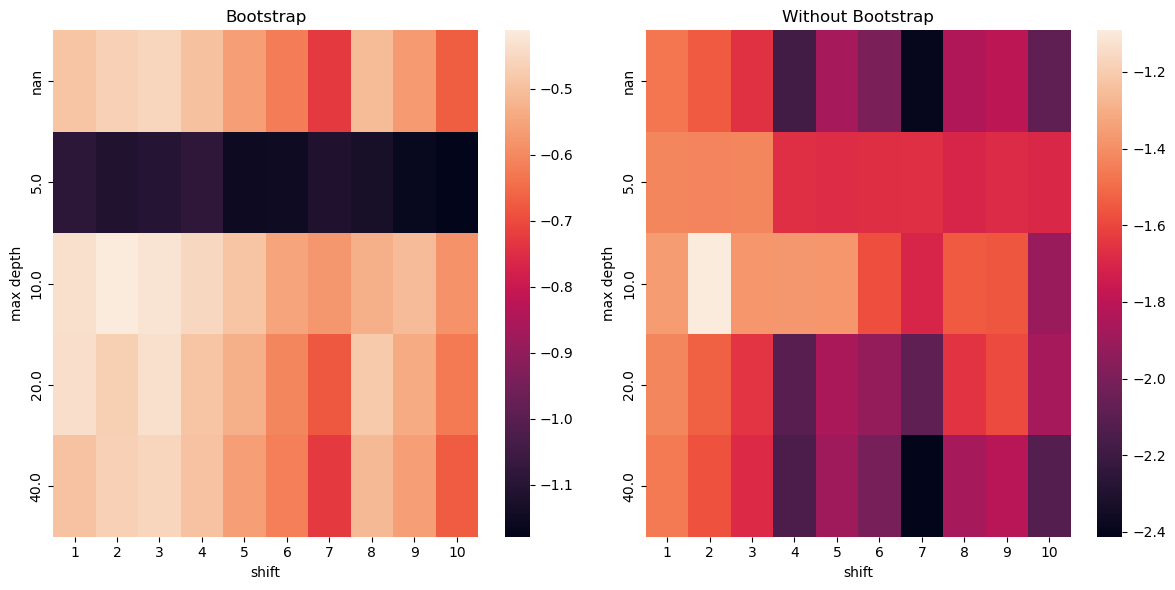

In [23]:
plt.figure(figsize=(12, 6))

true_df = results_df[results_df['bootstrap']==True].pivot(index='max depth', columns='shift', values='validation score')
plt.subplot(1, 2, 1)
sns.heatmap(true_df)
plt.title('Bootstrap')

false_df = results_df[results_df['bootstrap']==False].pivot(index='max depth', columns='shift', values='validation score')
plt.subplot(1, 2, 2)
sns.heatmap(false_df)
plt.title('Without Bootstrap')

plt.tight_layout()
plt.show()

# Neural Network

Note that unlike the previous 2 models, neural networks are sensitive to feature scales, hence we need to standardize/normalize the data. From the previous heatmap we note that some data like new deaths are sparse (many zeros), this will make normalization problematic. Hence we decide to scale it to min 0 max 1 (and not variance normalization). We fit the scaler to the train/validation set to prevent data leakage.

Due to longer computation time, we do not perform walk forward validation for neural networks but rather just split and take a 1 train and 1 validation set chronologically (with validation coming after train set). 

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler to train/val set
x_train = train_df.drop(columns=response_variables+['iso_code', 'date'])
y_train = train_df[response_variables]

# By default scales to [0,1]
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit(x_train)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit(y_train)

We start with a simple architecture. 

Num of layers: [1,2,3]

Num of units/layer: [256, 512, 1024]

lr: 0.0001

shift: [1, 5, 10]

Up to 200 epochs

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.callbacks import EarlyStopping, BackupAndRestore, CSVLogger, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [26]:
import keras

def train_nn(model, train_df, shift, epochs,
            chkpt_path, best_path, log_path, patience, 
            lr=0.0001, img_path=None):
    '''
    Trains a model with Adam and MSE loss, saving backup checkpoints if training is interrupted. 
    Also saves best epoch weights in terms of validation loss and has early stopping.
    Plots the training and validation loss and optionally saves the plot.
    Loads the best model weights and returns the model

    Inputs:
    model is the keras model architecture to train
    train_df is the full train/val dataframe (before rescalingn and splitting into x and y)
    shift is the number of days to shift for time dependent variables
    epochs is the maximum number of epochs to train until
    chkpt_path is the path for saving backups in case training is interrupted
    best_path is the path of the best epoch weights
    log_path is the path that the training logs are stored
    lr is the learning rate of Adam
    patience is the number of epochs befor early stopping kics in 
    img_path is the path to save the training/val loss plot. If set to None, will not save
    '''
    # Shift and compute the train/val sets (No walk forward validation due to compute limitations)
    # Create lag features for predictors
    lag_df = train_df.copy()
    for feature in time_dep_variables:
        for i in range(1, shift + 1):
            lag_df[f'{feature}_lag_{i}'] = train_df.groupby('iso_code')[feature].shift(i)
    lag_df = lag_df.dropna()

    # Split into train and validation
    train_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[:9*len(group.index)//10,:])
    val_df = lag_df.groupby('iso_code').apply(lambda group: group.iloc[9*len(group.index)//10:,:])

    # Drop irrelevant columns to get x,y
    x_train = train_df.drop(columns=response_variables+['iso_code', 'date']+ time_dep_variables)
    y_train = train_df[response_variables]
    x_val = val_df.drop(columns=response_variables+['iso_code', 'date']+ time_dep_variables)
    y_val = val_df[response_variables]

    # Rescale

    # Compile and fit the Model
    optim = Adam(learning_rate=lr)
    model.compile(optimizer=optim, loss=tf.keras.losses.MeanSquaredError())

    early_stopping = EarlyStopping(patience=patience)
    restore_callback = BackupAndRestore(backup_dir=chkpt_path, save_freq=1,
                                        delete_checkpoint = False)
    best_chkpt = ModelCheckpoint(
        best_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        save_freq='epoch'
    )

    logger_callback = CSVLogger(log_path, append=True)

    # Read previous losses if they exist
    if os.path.exists(log_path):
        try:
            previous_training_logs = pd.read_csv(log_path)
            print(previous_training_logs)
            if len(previous_training_logs.index) < epochs:
                history = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping, restore_callback, logger_callback, best_chkpt])
        except:
            print('Failed to read previous logs. May not exist or may be an error.')
            history = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping, restore_callback, logger_callback, best_chkpt])
    else:
        history = model.fit(x=x_train, y=y_train, epochs=epochs, validation_data=(x_val, y_val),
                                    callbacks=[early_stopping, restore_callback, logger_callback, best_chkpt])
    

    # Plot the validation loss and traininig loss across different epochs
    updated_logs = pd.read_csv(log_path)
    plt.plot(updated_logs['epoch'], updated_logs['loss'], label='Training loss')
    plt.plot(updated_logs['epoch'], updated_logs['val_loss'], label='Validation loss')

    # Often the loss in the first few epochs are very large, and it's not worth including
    # We take largest epoch loss *1.1 as the top of the graph
    plt.ylim(top=(max(updated_logs['val_loss'][3:]*1.1 + updated_logs['loss'][3:]*1.1)))
    plt.legend()
    if img_path != None:
        plt.savefig(img_path)
    plt.show()

    # Loads best model weights and evaluates on validation set
    model.load_weights(best_path)
    y_pred = model.predict(x_val)
    scorer = keras.metrics.R2Score()
    scorer.update_state(tf.cast(y_val, tf.float32), y_pred)
    
    val_score = scorer.result()

    return model, val_score


   epoch         loss   val_loss
0      0  2333.002441  83.709755
1      1  2333.884033  83.661476
2      2  2332.782227  83.613914
3      3  2332.076416  83.567604


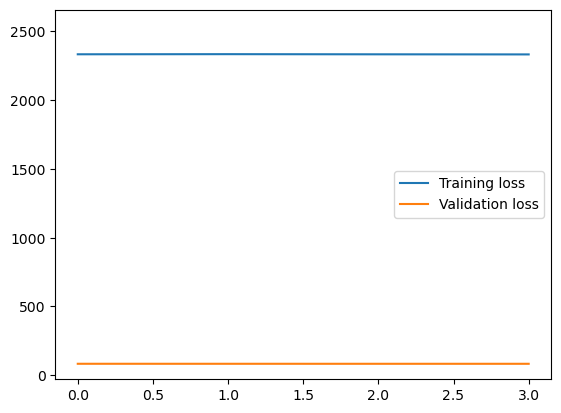

c:\Users\winfr\anaconda3\envs\tf\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
tf.Tensor(-1.2492179, shape=(), dtype=float32)


In [27]:
shift_test = 2
# Test function above
test_model = models.Sequential([
    layers.Input(shape=(12+5*shift_test,)),
    layers.Dense(1, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='relu'), 
    layers.Dense(3, activation='sigmoid')
], name='test_model')
test_model, val_score = train_nn(test_model, train_df, shift=shift_test, epochs=4,
            chkpt_path='output/nn/test_model/backup_chkpt', best_path='output/nn/test_model/best_chkpt.keras', log_path='output/nn/test_model/test_log.csv', 
            patience=3, lr=0.0001, img_path=None)
print(val_score)

17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 2399.8464 - val_loss: 81.6748
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2400.2288 - val_loss: 81.6748
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2348.8447 - val_loss: 81.6748
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 2324.0288 - val_loss: 81.8711
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - loss: 2351.9661 - val_loss: 81.8711
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 2303.3447 - val_loss: 81.8711
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2452.6567 - val_loss: 81.8711
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2221.8647 - val_loss: 81.8711
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 2250.5505 - val_loss: 81.8711
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2315.6238 - val_loss: 81.8711
Epoch 11/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 23

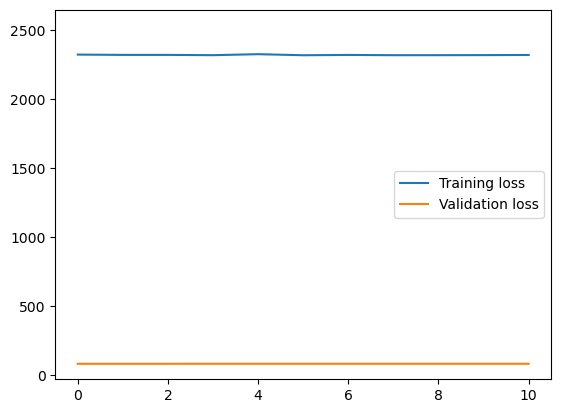

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 2337.0774 - val_loss: 85.7047
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2381.4705 - val_loss: 85.7047
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2270.2854 - val_loss: 85.7047
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - loss: 2226.9504 - val_loss: 85.7047
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 2302.1050 - val_loss: 85.7047
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 2435.3823 - val_loss: 85.7047
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 2272.0095 - val_loss: 85.7047
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 2279.0608 - val_loss: 85.7047
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 2355.2349 - val_loss: 85.7047
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - loss: 2215.4583 - val_loss: 85.7047
Epoch 11/200
833/833 ━━━━━━

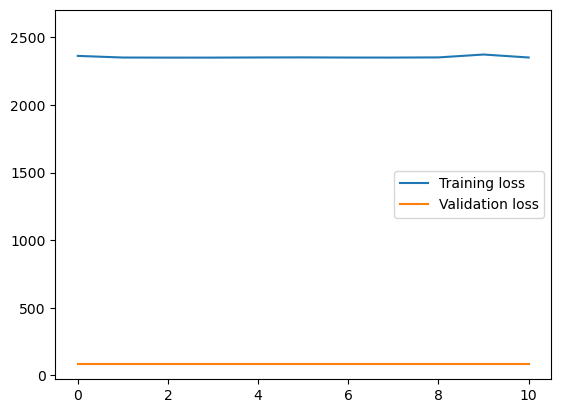

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - loss: 2387.5735 - val_loss: 82.5099
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - loss: 2282.8838 - val_loss: 82.5099
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - loss: 2266.0486 - val_loss: 82.7422
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - loss: 2309.0896 - val_loss: 82.7422
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 2283.0825 - val_loss: 82.7422
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 2313.4482 - val_loss: 82.7422
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 2384.8557 - val_loss: 82.7422
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - loss: 2346.2339 - val_loss: 82.7422
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 2365.4089 - val_loss: 82.7422
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 2341.9365 - val_loss: 82.7422
Epoch 11/200
829/829 ━━━━━━

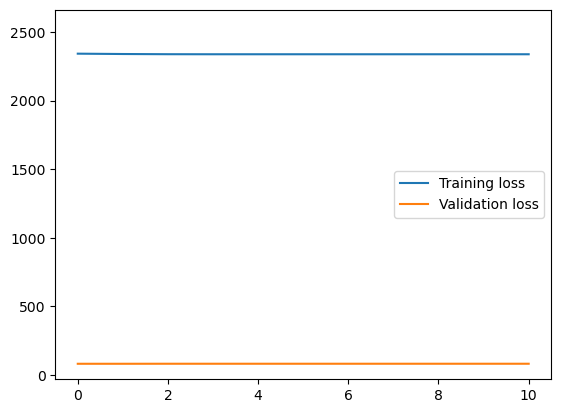

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - loss: 2367.9060 - val_loss: 84.6026
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 2290.1577 - val_loss: 84.6026
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 2266.1470 - val_loss: 84.6026
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 2468.6067 - val_loss: 84.6026
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 2329.2798 - val_loss: 84.6026
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 2384.4294 - val_loss: 84.6026
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 2308.1826 - val_loss: 84.6026
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 2317.2012 - val_loss: 84.6026
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 2225.3123 - val_loss: 84.6026
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - loss: 2491.3574 - val_loss: 84.6026
Epoch 11/200
835/835 ━━━━━━

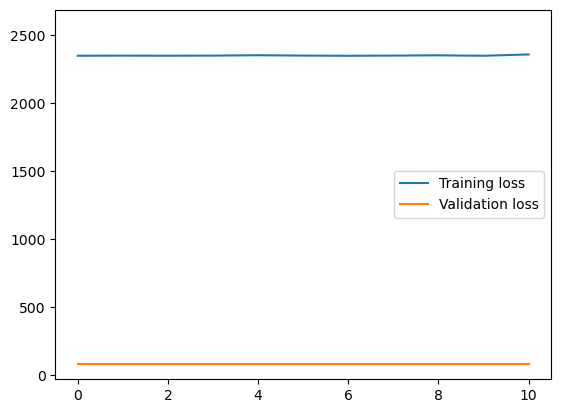

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - loss: 2252.5562 - val_loss: 82.5096
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - loss: 2314.2927 - val_loss: 82.5096
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - loss: 2231.8943 - val_loss: 82.5096
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - loss: 2293.0383 - val_loss: 82.5096
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - loss: 2368.5212 - val_loss: 82.5096
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 60s 72ms/step - loss: 2266.2620 - val_loss: 82.5096
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2325.2163 - val_loss: 82.5096
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 56s 67ms/step - loss: 2322.8259 - val_loss: 82.5096
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 2336.9011 - val_loss: 82.5096
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - loss: 2336.1792 - val_loss: 82.5096
Epoch 11/200
833/833 ━━━━━

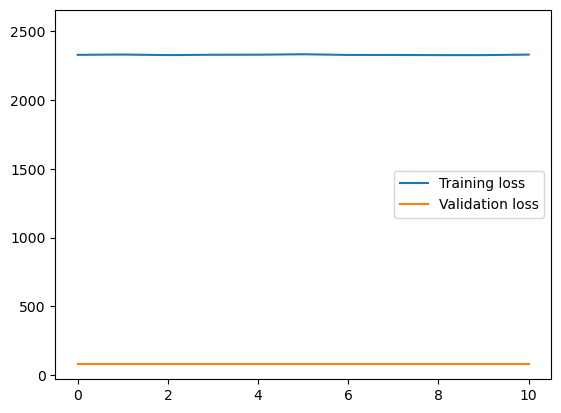

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - loss: 2328.9614 - val_loss: 85.7047
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 2350.6230 - val_loss: 85.7047
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - loss: 2331.2593 - val_loss: 85.7047
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - loss: 2346.2397 - val_loss: 85.7047
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 51s 62ms/step - loss: 2398.4336 - val_loss: 85.7047
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - loss: 2375.9805 - val_loss: 85.7047
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - loss: 2298.1985 - val_loss: 85.7047
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - loss: 2400.2502 - val_loss: 85.7047
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - loss: 2261.3474 - val_loss: 85.7047
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - loss: 2432.3818 - val_loss: 85.7047
Epoch 11/200
829/829 ━━━━━━

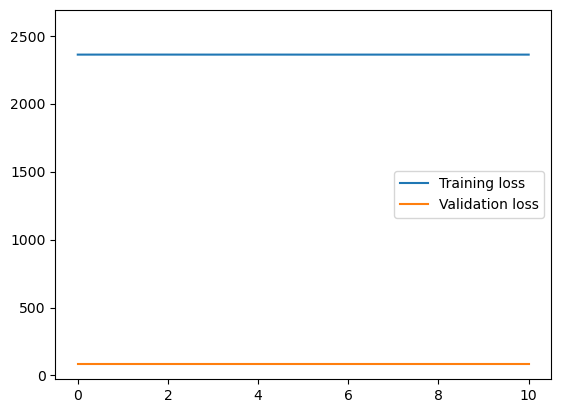

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - loss: 2473.4216 - val_loss: 81.6748
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 2285.2664 - val_loss: 81.6748
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - loss: 2382.5105 - val_loss: 81.8711
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - loss: 2286.5359 - val_loss: 81.8711
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - loss: 2264.6338 - val_loss: 81.8711
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - loss: 2251.9443 - val_loss: 81.8711
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/step - loss: 2309.0693 - val_loss: 81.8711
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - loss: 2311.8870 - val_loss: 81.8711
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - loss: 2247.3022 - val_loss: 81.8711
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - loss: 2234.3894 - val_loss: 81.8711
Epoch 11/200
835/835 ━━━━━━

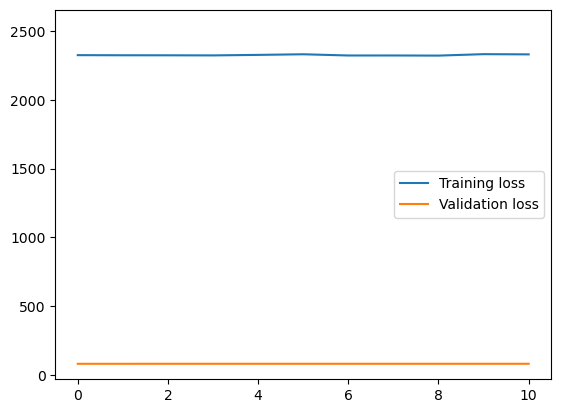

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 54s 63ms/step - loss: 2280.1167 - val_loss: 82.3147
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - loss: 2243.6038 - val_loss: 82.3147
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 52s 63ms/step - loss: 2379.4189 - val_loss: 82.3147
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - loss: 2305.3809 - val_loss: 82.3147
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 50s 61ms/step - loss: 2399.0974 - val_loss: 82.3147
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 75s 52ms/step - loss: 2266.4802 - val_loss: 82.3147
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - loss: 2365.3152 - val_loss: 82.3147
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - loss: 2249.0728 - val_loss: 82.3147
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - loss: 2321.3909 - val_loss: 82.3147
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - loss: 2241.9683 - val_loss: 82.3147
Epoch 11/200
833/833 ━━━━━━

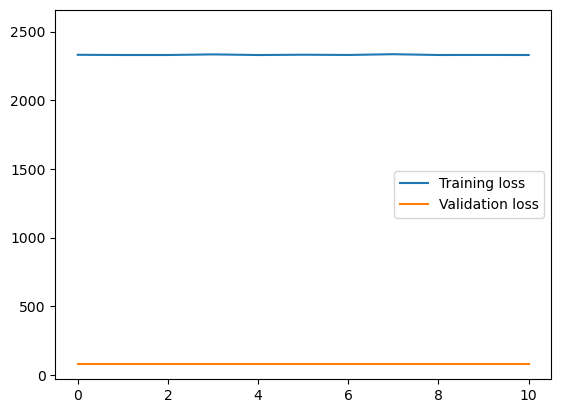

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - loss: 2293.6768 - val_loss: 82.7422
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - loss: 2340.6550 - val_loss: 82.7422
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - loss: 2315.9202 - val_loss: 82.7422
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 52s 63ms/step - loss: 2395.8936 - val_loss: 82.7422
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 52s 63ms/step - loss: 2346.4761 - val_loss: 82.7422
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - loss: 2367.9470 - val_loss: 82.7422
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - loss: 2350.1909 - val_loss: 82.7422
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 53s 64ms/step - loss: 2389.6538 - val_loss: 82.7422
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - loss: 2200.6213 - val_loss: 82.7422
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - loss: 2408.1431 - val_loss: 82.7422
Epoch 11/200
829/829 ━━━━━━

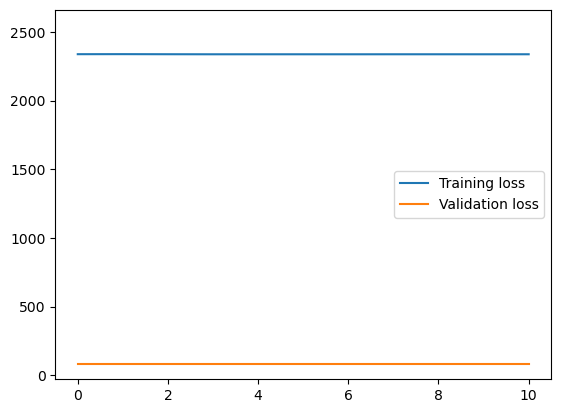

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 62s 71ms/step - loss: 2216.2720 - val_loss: 81.6748
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 58s 70ms/step - loss: 2414.2214 - val_loss: 81.6748
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/step - loss: 2164.2019 - val_loss: 81.6748
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - loss: 2272.3911 - val_loss: 81.6748
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 2254.8906 - val_loss: 81.6748
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - loss: 2306.7437 - val_loss: 81.6748
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - loss: 2174.1230 - val_loss: 81.6748
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - loss: 2258.3159 - val_loss: 81.6748
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - loss: 2339.7791 - val_loss: 81.6748
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - loss: 2430.7930 - val_loss: 81.6748
Epoch 11/200
835/835 ━━━━━━

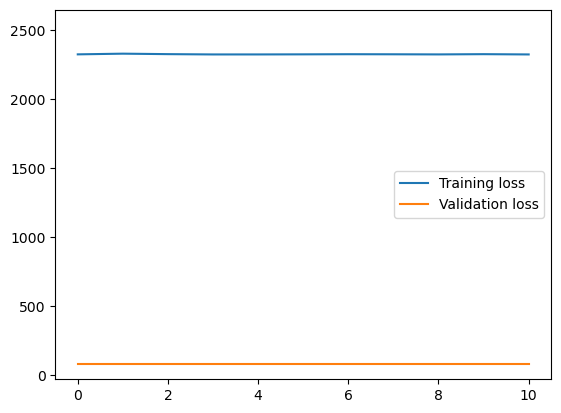

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 74s 85ms/step - loss: 2358.7300 - val_loss: 85.7047
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - loss: 2281.0437 - val_loss: 85.7047
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - loss: 2475.4949 - val_loss: 85.7047
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - loss: 2318.9683 - val_loss: 85.7047
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - loss: 2377.3164 - val_loss: 85.7047
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - loss: 2403.4795 - val_loss: 85.7047
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - loss: 2351.4531 - val_loss: 85.7047
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 58s 70ms/step - loss: 2322.2158 - val_loss: 85.7047
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 56s 67ms/step - loss: 2315.0308 - val_loss: 85.7047
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 60s 71ms/step - loss: 2241.7705 - val_loss: 85.7047
Epoch 11/200
833/833 ━━━━━━

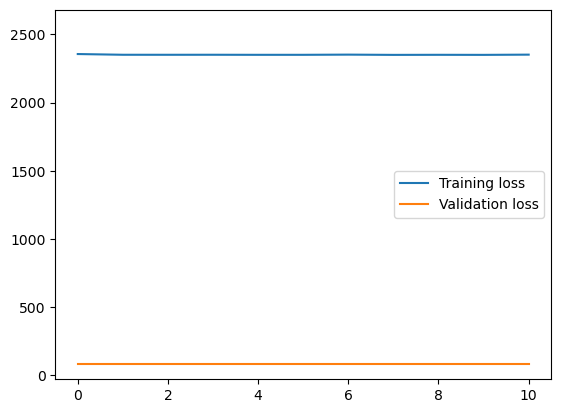

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 58s 67ms/step - loss: 2515.8438 - val_loss: 85.7047
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - loss: 2412.4341 - val_loss: 85.7047
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - loss: 2438.0432 - val_loss: 85.7047
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - loss: 2360.4202 - val_loss: 85.7047
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - loss: 2356.9155 - val_loss: 85.7047
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 58s 70ms/step - loss: 2387.3171 - val_loss: 85.7047
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - loss: 2385.0364 - val_loss: 85.7047
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 58s 70ms/step - loss: 2365.0173 - val_loss: 85.7047
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - loss: 2339.1670 - val_loss: 85.7047
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 58s 70ms/step - loss: 2269.7593 - val_loss: 85.7047
Epoch 11/200
829/829 ━━━━━━

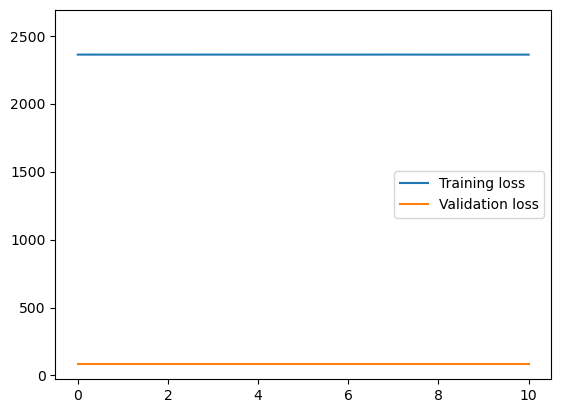

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 65s 75ms/step - loss: 2300.1555 - val_loss: 84.3763
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 64s 77ms/step - loss: 2279.2847 - val_loss: 84.3763
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - loss: 2439.5042 - val_loss: 84.3763
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - loss: 2315.5549 - val_loss: 84.3763
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 65s 78ms/step - loss: 2406.5540 - val_loss: 84.3763
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 67s 81ms/step - loss: 2369.2148 - val_loss: 84.3763
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 65s 77ms/step - loss: 2363.1011 - val_loss: 84.3763
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 69s 83ms/step - loss: 2325.6172 - val_loss: 84.3763
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 67s 80ms/step - loss: 2336.8242 - val_loss: 84.3763
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 74s 88ms/step - loss: 2322.8296 - val_loss: 84.3763
Epoch 11/200
835/835 ━━━━━━

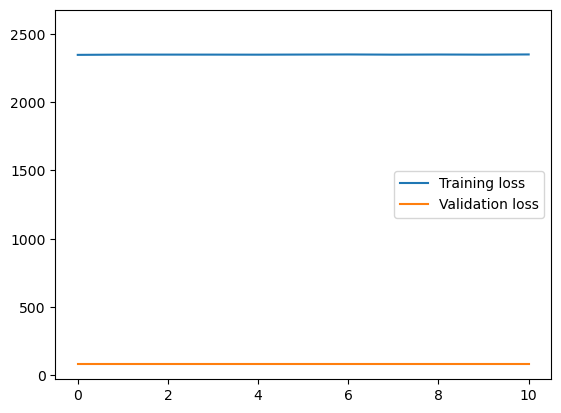

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 66s 75ms/step - loss: 2344.1030 - val_loss: 85.7047
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - loss: 2245.6990 - val_loss: 85.7047
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - loss: 2283.5225 - val_loss: 85.7047
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 69s 82ms/step - loss: 2460.4023 - val_loss: 85.7047
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 85s 102ms/step - loss: 2249.5432 - val_loss: 85.7047
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - loss: 2297.7444 - val_loss: 85.7047
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - loss: 2381.1716 - val_loss: 85.7047
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 76s 91ms/step - loss: 2414.5735 - val_loss: 85.7047
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - loss: 2383.0798 - val_loss: 85.7047
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - loss: 2297.5620 - val_loss: 85.7047
Epoch 11/200
833/833 ━━━━━

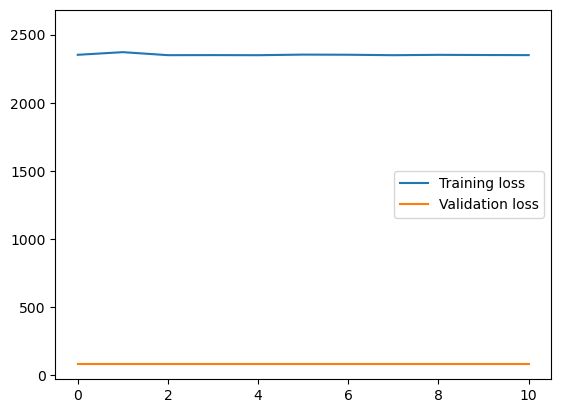

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 78s 89ms/step - loss: 2347.5190 - val_loss: 85.2773
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 72s 87ms/step - loss: 2421.6213 - val_loss: 85.2773
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 77s 93ms/step - loss: 2366.3054 - val_loss: 85.2773
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - loss: 2339.1021 - val_loss: 85.2773
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 87s 105ms/step - loss: 2319.3594 - val_loss: 85.2773
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - loss: 2256.9675 - val_loss: 85.2773
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - loss: 2279.0623 - val_loss: 85.2773
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - loss: 2339.4773 - val_loss: 85.2773
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 87s 105ms/step - loss: 2301.3159 - val_loss: 85.2773
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - loss: 2380.4053 - val_loss: 85.2773
Epoch 11/200
829/829 ━━━

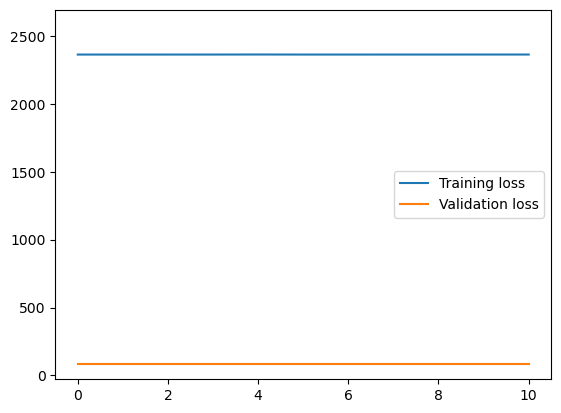

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 116s 136ms/step - loss: 2334.0869 - val_loss: 81.6748
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 111s 133ms/step - loss: 2379.1211 - val_loss: 81.6748
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 112s 134ms/step - loss: 2299.4653 - val_loss: 81.6748
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 107s 128ms/step - loss: 2475.4453 - val_loss: 81.6748
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 89s 107ms/step - loss: 2229.6833 - val_loss: 81.6748
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 94s 112ms/step - loss: 2294.6023 - val_loss: 81.6748
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 89s 107ms/step - loss: 2294.9783 - val_loss: 81.6748
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 176s 148ms/step - loss: 2255.3721 - val_loss: 81.6748
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 153s 161ms/step - loss: 2420.1826 - val_loss: 81.6748
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 130s 155ms/step - loss: 2413.9851 - val_loss: 81.6748
Epoch 11/2

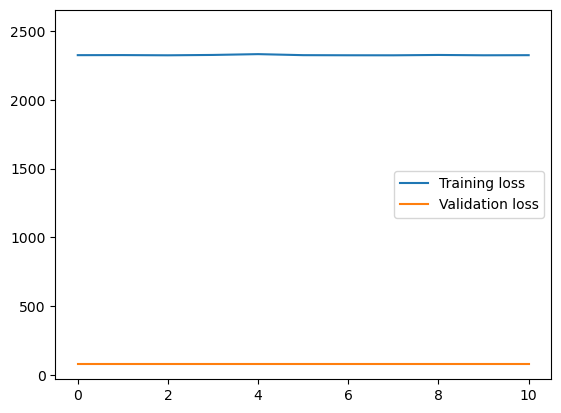

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 100s 115ms/step - loss: 2230.4814 - val_loss: 82.7423
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 70s 84ms/step - loss: 2300.5449 - val_loss: 82.7423
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - loss: 2367.6162 - val_loss: 82.7423
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 98s 117ms/step - loss: 2307.9080 - val_loss: 82.7423
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 113s 136ms/step - loss: 2367.8450 - val_loss: 82.7423
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 98s 118ms/step - loss: 2450.7363 - val_loss: 82.7423
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 99s 118ms/step - loss: 2283.1348 - val_loss: 82.7423
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 102s 122ms/step - loss: 2355.8381 - val_loss: 82.7423
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - loss: 2302.7610 - val_loss: 82.7423
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 98s 118ms/step - loss: 2266.2234 - val_loss: 82.7423
Epoch 11/200
833

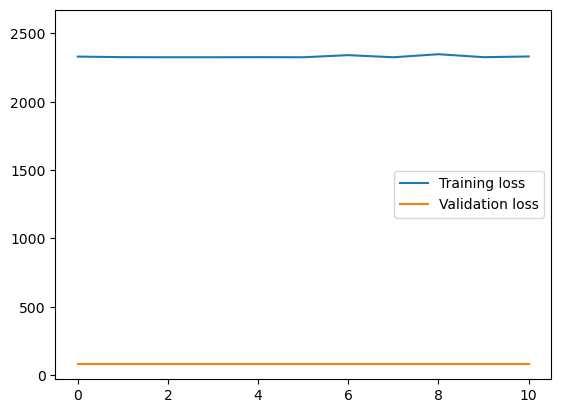

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 91s 106ms/step - loss: 2466.9707 - val_loss: 85.5097
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 90s 108ms/step - loss: 2314.5068 - val_loss: 85.5097
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - loss: 2377.7537 - val_loss: 85.5097
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - loss: 2383.9397 - val_loss: 85.5097
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 76s 91ms/step - loss: 2224.6562 - val_loss: 85.5097
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 112s 127ms/step - loss: 2366.2583 - val_loss: 85.5097
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 108s 130ms/step - loss: 2345.0879 - val_loss: 85.5097
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 120s 144ms/step - loss: 2324.8386 - val_loss: 85.5097
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 112s 135ms/step - loss: 2418.3044 - val_loss: 85.5097
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 109s 132ms/step - loss: 2434.3064 - val_loss: 85.5097
Epoch 11/200
82

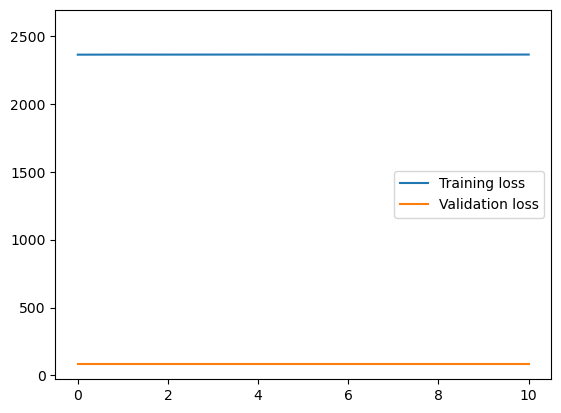

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 91s 104ms/step - loss: 2238.0615 - val_loss: 81.4485
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - loss: 2336.9109 - val_loss: 81.4485
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - loss: 2263.6814 - val_loss: 81.4485
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 88s 105ms/step - loss: 2370.2761 - val_loss: 81.4485
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 87s 104ms/step - loss: 2277.1204 - val_loss: 81.4485
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 88s 105ms/step - loss: 2351.0906 - val_loss: 81.4485
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 88s 106ms/step - loss: 2419.0586 - val_loss: 81.4485
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 87s 105ms/step - loss: 2390.0486 - val_loss: 81.4485
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - loss: 2324.5593 - val_loss: 81.4485
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 70s 84ms/step - loss: 2407.4368 - val_loss: 81.4485
Epoch 11/200
835/835 

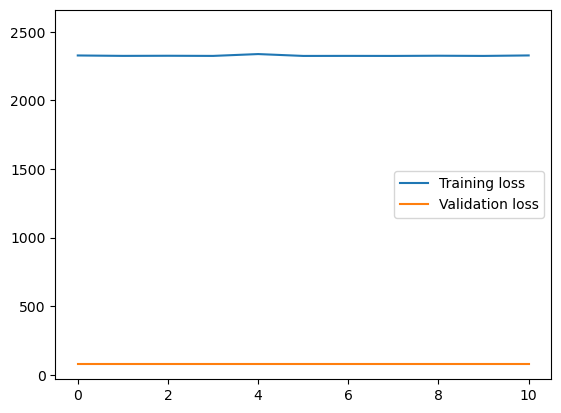

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 96s 110ms/step - loss: 2449.0186 - val_loss: 82.5474
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 101s 121ms/step - loss: 2433.0879 - val_loss: 82.5474
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 77s 92ms/step - loss: 2420.9526 - val_loss: 82.5474
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 64s 77ms/step - loss: 2320.9028 - val_loss: 82.5474
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 67s 81ms/step - loss: 2363.3286 - val_loss: 82.5474
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 72s 86ms/step - loss: 2288.2600 - val_loss: 82.5474
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 55s 65ms/step - loss: 2207.9907 - val_loss: 82.5474
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 59s 71ms/step - loss: 2370.4548 - val_loss: 82.5474
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - loss: 2330.7639 - val_loss: 82.5474
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - loss: 2246.0974 - val_loss: 82.5474
Epoch 11/200
833/833 ━━━

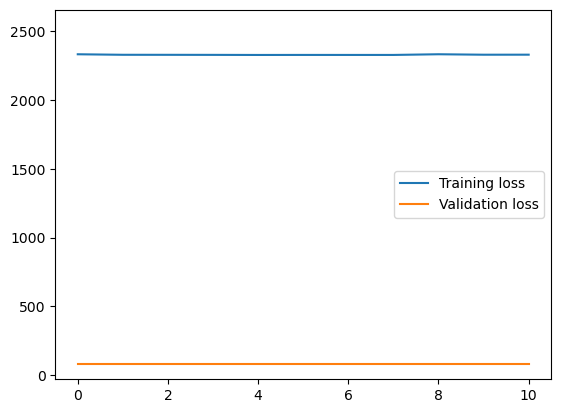

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - loss: 2333.2927 - val_loss: 85.5097
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 87s 104ms/step - loss: 2412.8923 - val_loss: 85.5097
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 145s 108ms/step - loss: 2386.3394 - val_loss: 85.5097
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 87s 105ms/step - loss: 2407.4727 - val_loss: 85.5097
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 140s 102ms/step - loss: 2406.1238 - val_loss: 85.5097
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 89s 107ms/step - loss: 2351.7874 - val_loss: 85.5097
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 90s 108ms/step - loss: 2251.4761 - val_loss: 85.5097
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 115s 138ms/step - loss: 2364.4878 - val_loss: 85.5097
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 139s 168ms/step - loss: 2460.6147 - val_loss: 85.5097
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 120s 141ms/step - loss: 2299.0098 - val_loss: 85.5097
Epoch 11/200


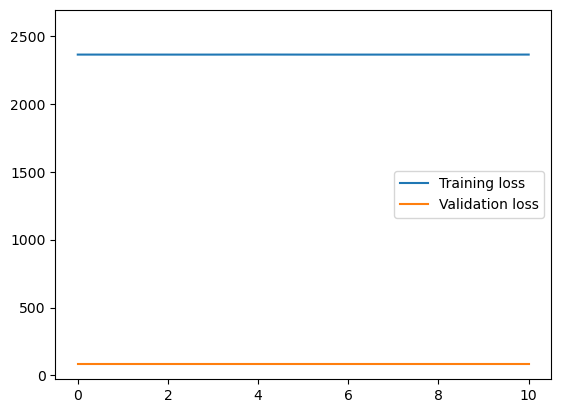

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 127s 146ms/step - loss: 2283.3989 - val_loss: 81.6448
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 131s 156ms/step - loss: 2465.6453 - val_loss: 81.6448
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 129s 155ms/step - loss: 2299.8599 - val_loss: 81.6448
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 121s 145ms/step - loss: 2352.8091 - val_loss: 81.6448
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 93s 112ms/step - loss: 2285.3242 - val_loss: 81.6448
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 162s 194ms/step - loss: 2205.2224 - val_loss: 81.6448
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 125s 150ms/step - loss: 2316.3669 - val_loss: 81.6448
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 2393.6321 - val_loss: 81.6448
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - loss: 2373.6887 - val_loss: 81.6448
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - loss: 2171.9221 - val_loss: 81.6448
Epoch 11/200
8

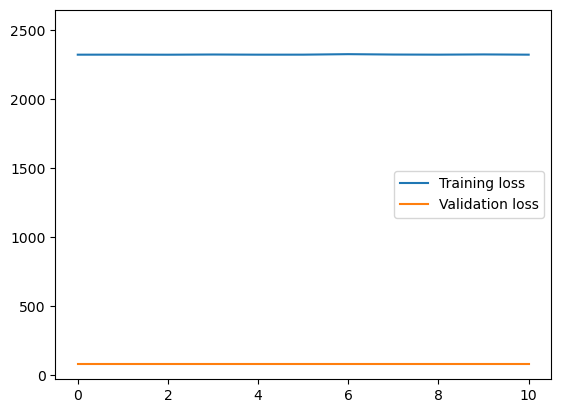

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 54s 62ms/step - loss: 2386.0459 - val_loss: 85.2771
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 56s 67ms/step - loss: 2396.9534 - val_loss: 85.2771
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 58s 70ms/step - loss: 2346.4988 - val_loss: 85.2771
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 62s 74ms/step - loss: 2382.8989 - val_loss: 85.2771
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 51s 62ms/step - loss: 2437.3640 - val_loss: 85.2771
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 77s 55ms/step - loss: 2443.0610 - val_loss: 85.2771
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 2387.7515 - val_loss: 85.2771
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 2286.3843 - val_loss: 85.2771
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - loss: 2319.6929 - val_loss: 85.2771
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - loss: 2407.9348 - val_loss: 85.2771
Epoch 11/200
833/833 ━━━━━━

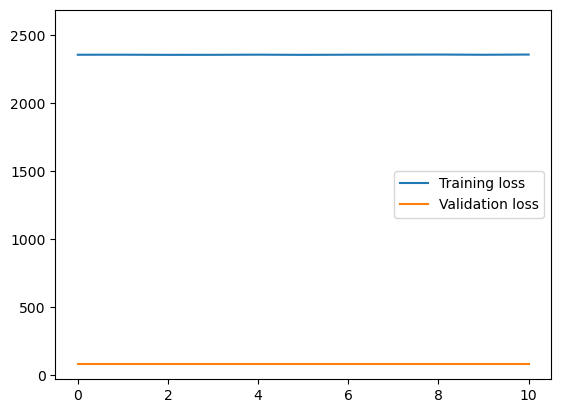

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - loss: 2237.3528 - val_loss: 82.5099
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - loss: 2268.4768 - val_loss: 82.5099
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - loss: 2337.7266 - val_loss: 82.5099
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - loss: 2257.4971 - val_loss: 82.5099
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - loss: 2386.3201 - val_loss: 82.5099
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - loss: 2386.4451 - val_loss: 82.5099
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 2218.7646 - val_loss: 82.5099
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 2169.6543 - val_loss: 82.5099
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - loss: 2266.0322 - val_loss: 82.5099
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 2352.6025 - val_loss: 82.5099
Epoch 11/200
829/829 ━━━━━━

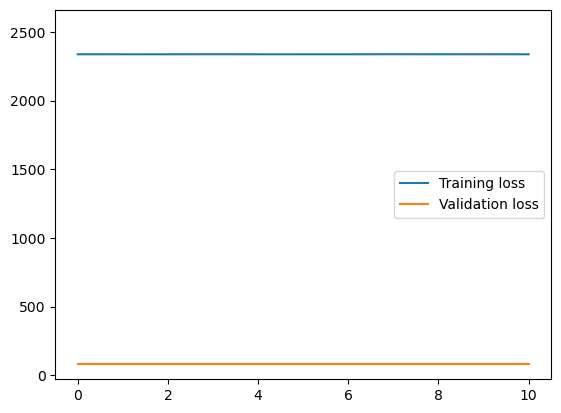

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
17
Epoch 1/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - loss: 2275.5503 - val_loss: 81.4485
Epoch 2/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2384.1067 - val_loss: 81.4485
Epoch 3/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 102s 123ms/step - loss: 2236.8828 - val_loss: 81.4485
Epoch 4/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 115s 137ms/step - loss: 2356.9822 - val_loss: 81.4485
Epoch 5/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - loss: 2262.9553 - val_loss: 81.4485
Epoch 6/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 84s 100ms/step - loss: 2340.1809 - val_loss: 81.4485
Epoch 7/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2148.8247 - val_loss: 81.4485
Epoch 8/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - loss: 2295.0015 - val_loss: 81.4485
Epoch 9/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - loss: 2326.3140 - val_loss: 81.4485
Epoch 10/200
835/835 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - loss: 2218.2759 - val_loss: 81.4485
Epoch 11/200
835/83

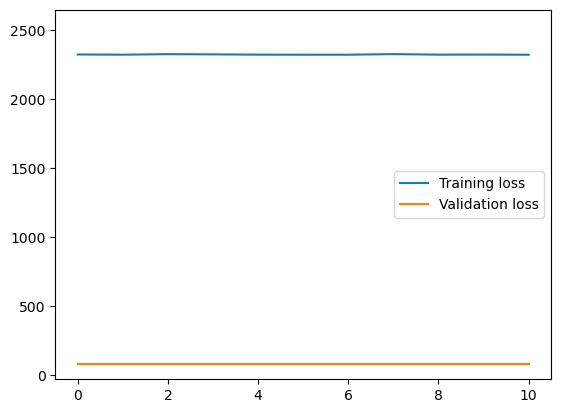

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37
Epoch 1/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step - loss: 2301.6052 - val_loss: 82.7423
Epoch 2/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - loss: 2392.1240 - val_loss: 82.7423
Epoch 3/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2456.4346 - val_loss: 82.7423
Epoch 4/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - loss: 2365.2561 - val_loss: 82.7423
Epoch 5/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - loss: 2362.5125 - val_loss: 82.7423
Epoch 6/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2352.5247 - val_loss: 82.7423
Epoch 7/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2331.6731 - val_loss: 82.7423
Epoch 8/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2297.1509 - val_loss: 82.7423
Epoch 9/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - loss: 2303.2505 - val_loss: 82.7423
Epoch 10/200
833/833 ━━━━━━━━━━━━━━━━━━━━ 84s 100ms/step - loss: 2330.4954 - val_loss: 82.7423
Epoch 11/200
833/83

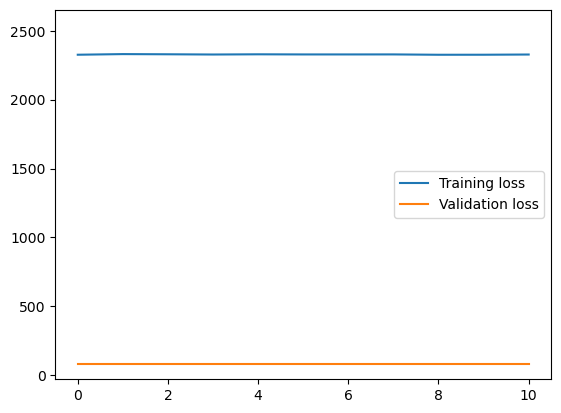

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
62
Epoch 1/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 85s 100ms/step - loss: 2273.4031 - val_loss: 82.7422
Epoch 2/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - loss: 2367.3494 - val_loss: 82.7422
Epoch 3/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - loss: 2255.3828 - val_loss: 82.7422
Epoch 4/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2425.2407 - val_loss: 82.7422
Epoch 5/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - loss: 2310.5786 - val_loss: 82.7422
Epoch 6/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2306.8738 - val_loss: 82.7422
Epoch 7/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2330.4934 - val_loss: 82.7422
Epoch 8/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2355.9438 - val_loss: 82.7422
Epoch 9/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2316.4753 - val_loss: 82.7422
Epoch 10/200
829/829 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - loss: 2370.3469 - val_loss: 82.7422
Epoch 11/200
829/82

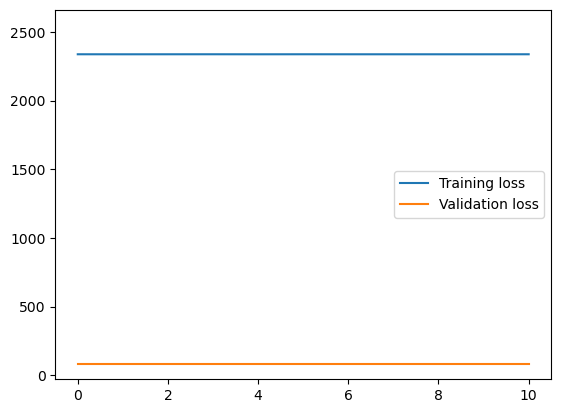

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [28]:
layer_list = [1, 2, 3]
unit_list = [256, 512, 1024]
lr = 0.0001
shift_list = [1, 5, 10]

results_path = 'output/nn_results.csv'
if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)
else:
    results_scores = []
    for layer in layer_list:
        for unit in unit_list:
            for shift in shift_list:
                print(12+5*shift)
                # Define model based on hyperparameters
                model = models.Sequential()
                model.add(layers.Input(shape=(12+5*shift,)))
                for _ in range(layer):
                    model.add(layers.Dense(unit, activation='relu'))
                    model.add(layers.Dropout(0.1))
                model.add(layers.Dense(3, activation='sigmoid'))
                
                dir_path = f'output/nn/{layer}layer_{unit}unit_{shift}shift'
                if not os.path.exists(dir_path):
                    os.makedirs(dir_path)
                model, val_score = train_nn(model, train_df, shift=shift, epochs=200,
                                    chkpt_path=dir_path+'/backup_chkpt', best_path=dir_path+'/best_chkpt.keras', log_path=dir_path+'/test_log.csv', 
                                    patience=10, lr=0.001, img_path=dir_path+'/loss.png')
                results_scores.append({
                'shift': shift,
                'units per layer': unit,
                'number of hidden layers': layer,
                'validation score': val_score
                })
    # Convert scores to DataFrame
    results_df = pd.DataFrame(results_scores)
    results_df.to_csv(results_path)

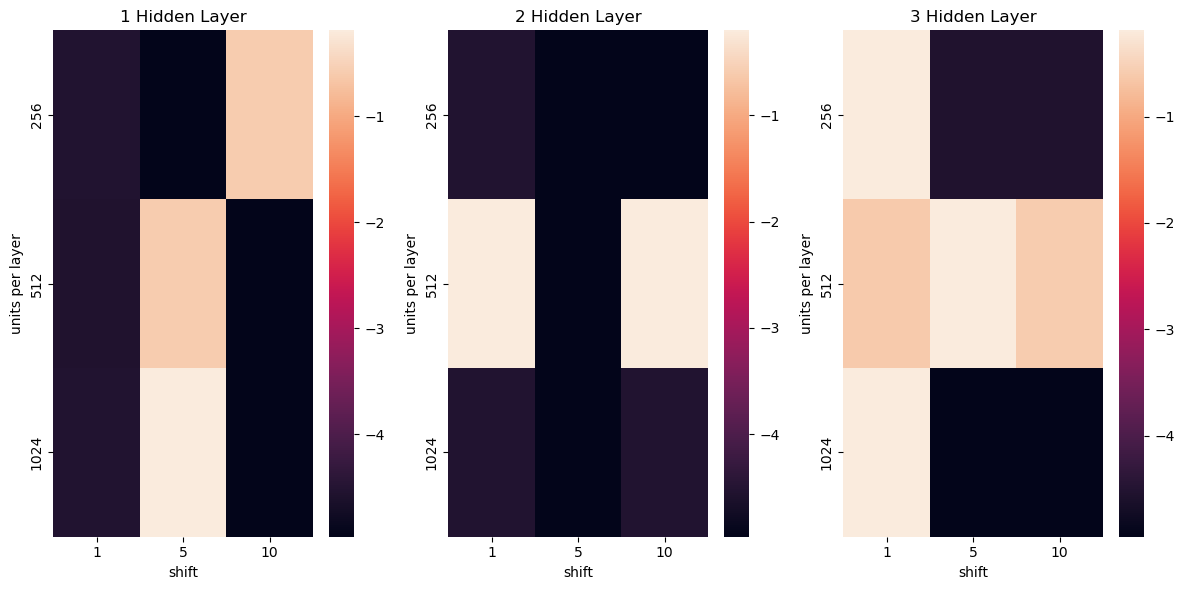

In [34]:
plt.figure(figsize=(12, 6))
results_df['validation score'] = results_df['validation score'].map(lambda x: x.numpy())

temp_df = results_df[results_df['number of hidden layers']==1].pivot(index='units per layer', columns='shift', values='validation score')
plt.subplot(1, 3, 1)
sns.heatmap(temp_df)
plt.title('1 Hidden Layer')

temp_df = results_df[results_df['number of hidden layers']==2].pivot(index='units per layer', columns='shift', values='validation score')
plt.subplot(1, 3, 2)
sns.heatmap(temp_df)
plt.title('2 Hidden Layer')

temp_df = results_df[results_df['number of hidden layers']==3].pivot(index='units per layer', columns='shift', values='validation score')
plt.subplot(1, 3, 3)
sns.heatmap(temp_df)
plt.title('3 Hidden Layer')

plt.tight_layout()
plt.show()